In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('../input/mydata/BalancedDataHalfNumbers3.csv')
data

,Title,category
0,professor kingsleys impression marc jacob for ...,Beauty
1,caesar for men gift setoz col sprayoz aftersha...,Beauty
2,redken rough pasteworking material quantity,Beauty
3,for new amazon kindle paperwhitetoopootreg pre...,Beauty
4,butter london lippy bloody brilliant lip crayo...,Beauty
...,...,...
179995,limited edition femme fatale street fighter iv...,Video Games
179996,century accessory pro classic game controller ...,Video Games
179997,insider tale stolen venus download,Video Games
179998,3g mobile broadband modem,Video Games


In [3]:
# Shuffling a Pandas dataframe with .shuffle()
data = data.sample(frac=1).reset_index(drop=True)
data

,Title,category
0,ce compass bluetooth hid wireless keyboard mou...,Electronics
1,timken lm48510 wheel bearing,Automotive
2,team realtree 3pack floatable rubber dummy dog...,Pet Supplies
3,temperedglass round angle high definition hd h...,Cell Phones and Accessories
4,far rockaway rockaway beach rockaway park long...,Books
...,...,...
179995,glassesshop polarized sport sunglass with tr90...,Sports and Outdoors
179996,post alpha bit cerealoz,Grocery and Gourmet Food
179997,bulk buy darice diy craft glass ornament clear...,Arts Crafts and Sewing
179998,fashion gallery 20000pcs light blue color crys...,Beauty


In [4]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[ 7  2 13 ...  1  3  4]
To_Categorical
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
textList=[]
for text in data["Title"]:
    textList.append(text)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#preparing x for ANN
tfidv = TfidfVectorizer()
x = tfidv.fit_transform(textList)
x.sort_indices()

x_train,x_test,y_train,y_test = train_test_split(x,categorical_y,test_size=0.2,random_state=42)

In [7]:
y_train.shape
#215057

(144000, 18)

# ANN

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adamax, Adam, SGD # - Works
from keras.utils.vis_utils import plot_model
from keras.losses import categorical_crossentropy

def build_ann_model(x_train):
    model = Sequential()
    
    model.add(Dense(units=1024,activation="relu",input_dim=x_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=256,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=y_train.shape[1],activation="softmax"))
    #2=> 0.01 and 15 iteration
    optimizer = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adam")
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

In [9]:
#pip install pydot

In [10]:
#ann_model = build_ann_model()
#plot_model(ann_model,show_shapes=True)

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import accuracy_score
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC


def select_features_CH2(p,x_train, y_train, x_test):
    #CH2 = SelectKBest(score_func=chi2, k=3390)
    CH2 = SelectPercentile(chi2, percentile=p)
    CH2.fit(x_train, y_train)
    x_train_CH2 = CH2.transform(x_train)
    x_test_CH2 = CH2.transform(x_test)
    return x_train_CH2, x_test_CH2, CH2

accuracies = {}

for p in range(85, 105, 5):
    print("Percentage of features is:", p)
    x_train_CH2, x_test_CH2, CH2 = select_features_CH2(p,x_train, y_train, x_test)
    n = x_train_CH2.shape[1]
    print("Number of features is:", n)
    ann_model = build_ann_model(x_train_CH2)
    #plot_model(ann_model,show_shapes=True)


    ann_history = ann_model.fit(x_train_CH2,y_train,epochs=20,batch_size=200,shuffle=True)
    #256
    y_pred = ann_model.predict(x_test_CH2)



    accuracy = accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
    #accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    print("Accuracy for the {} best features is: {}%".format(n, accuracy))
    ss = "ann4_p-"+str(p)+"_n-"+str(n)+"_acc-"+str(accuracy)+".h5"
    ann_model.save(ss)
    accuracies[p] = [n, accuracy, ss]

Percentage of features is: 85
Number of features is: 182798


2022-08-09 10:47:47.372873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 10:47:47.517996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 10:47:47.521937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 10:47:47.528044: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/20


2022-08-09 10:47:52.220751: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


720/720 [==============================] - 38s 49ms/step - loss: 2.8694 - accuracy: 0.2418
Epoch 2/20
720/720 [==============================] - 36s 49ms/step - loss: 2.5309 - accuracy: 0.4862
Epoch 3/20
720/720 [==============================] - 36s 50ms/step - loss: 1.8998 - accuracy: 0.6005
Epoch 4/20
720/720 [==============================] - 36s 50ms/step - loss: 1.4371 - accuracy: 0.6854
Epoch 5/20
720/720 [==============================] - 36s 49ms/step - loss: 1.1311 - accuracy: 0.7437
Epoch 6/20
720/720 [==============================] - 36s 49ms/step - loss: 0.9220 - accuracy: 0.7853
Epoch 7/20
720/720 [==============================] - 36s 50ms/step - loss: 0.7769 - accuracy: 0.8144
Epoch 8/20
720/720 [==============================] - 36s 50ms/step - loss: 0.6702 - accuracy: 0.8389
Epoch 9/20
720/720 [==============================] - 36s 49ms/step - loss: 0.5869 - accuracy: 0.8590
Epoch 10/20
720/720 [==============================] - 36s 50ms/step - loss: 0.5188 - accurac

In [21]:
from sklearn.feature_selection import SelectPercentile, chi2
CH2 = SelectPercentile(chi2, percentile=85)
CH2.fit(x_train, y_train)
x_train_CH2=CH2.transform(x_train)
x_test_CH2 = CH2.transform(x_test)
ann_model = keras.models.load_model('ann4_p-85_n-182798_acc-0.7935833333333333.h5')
y_pred = ann_model.predict(x_test_CH2)
print("Number of features is:", x_train_CH2.shape[1])
ann_accuracy = accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))

print("The best accuracy after feature selection is" , ann_accuracy)

Number of features is: 182798
The best accuracy after feature selection is 0.7935833333333333


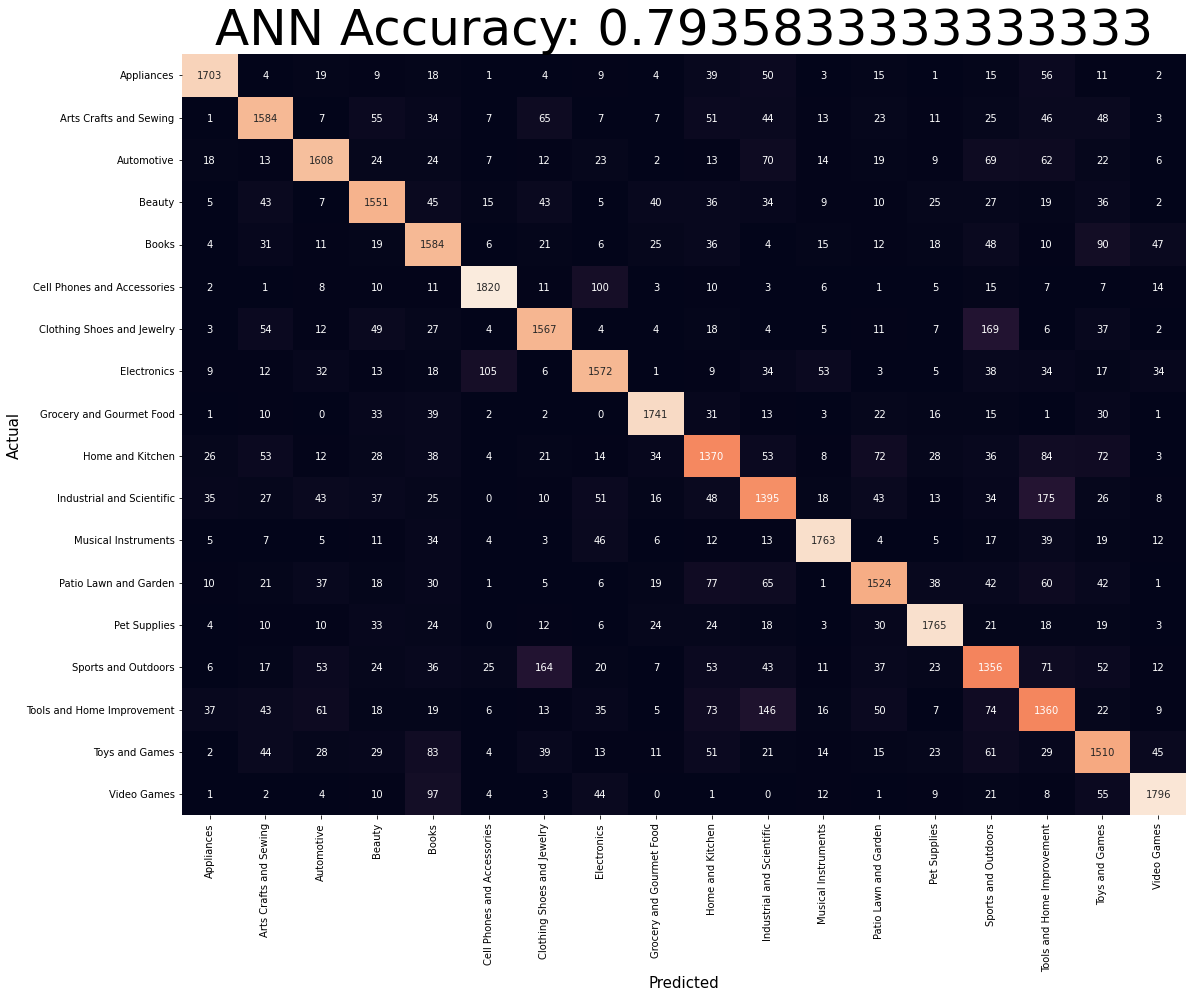

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
ann_accuracy = accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
#print("ANN Accuracy:",ann_accuracy)
ann_cn = confusion_matrix(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(ann_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("ANN Accuracy: {}".format(ann_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

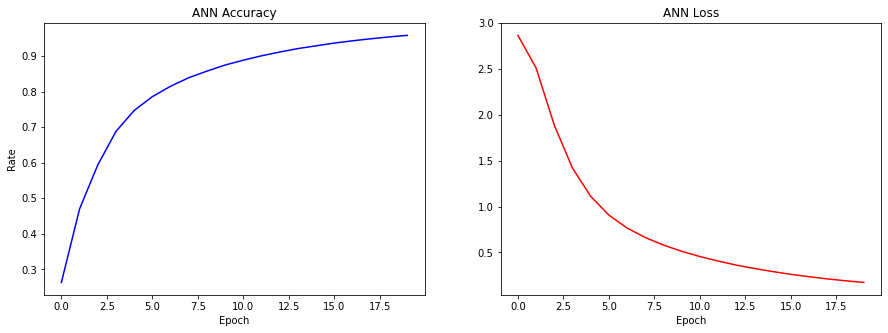

In [24]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(ann_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(ann_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("ANN Accuracy")
axe1[1].title.set_text("ANN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()